In [1]:
import pandas as pd
import numpy as np


In [2]:
import numpy as np
def sigmoid(z):
    z = np.clip(z, -500, 500)   
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(a):
    return a * (1 - a)



In [3]:
df = pd.read_csv("Medicaldataset.csv")

testd = df.iloc[1000:,:].copy()
df = df.iloc[:1000,:].copy()

df.iloc[:,-1] = (df.iloc[:,-1] == 'positive').astype(int)
testd.iloc[:,-1] = (testd.iloc[:,-1] == 'positive').astype(int)

Y = df.iloc[:,-1].to_numpy(dtype=int).reshape(-1,1)
X = df.iloc[:,:-1].to_numpy()

In [4]:
np.random.seed(42)  # reproducibility
W1 = np.random.randn(30, X.shape[1])   # (5, n_features)
b1 = np.zeros((1, 30))                 # (1, 5)

W2 = np.random.randn(1, 30)            # (1, 5)
b2 = np.zeros((1, 1))                 # (1, 1)

learning_rate = 0.0001
epochs = 10000000


In [ ]:
cost=[]
for epoch in range(epochs):

    # Forward pass
    Z1 = np.dot(X, W1.T) + b1         # (m,5)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2.T) + b2        # (m,1)
    A2 = sigmoid(Z2)

    # Loss
    m = X.shape[0]
    loss = -(1/m) * np.sum(Y * np.log(A2+1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8))  

    # Backward pas
    dZ2 = A2 - Y                         
    dW2 = (1/m) * np.dot(dZ2.T, A1)     # (1,5)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True) 

    dA1 = np.dot(dZ2, W2)               # (m,5)
    dZ1 = dA1 * sigmoid_derivative(A1)  # (m,5)
    dW1 = (1/m) * np.dot(dZ1.T, X)      # (5,n_features)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # (1,5)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if (epoch+1) % 1000 == 0:
        cost.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")


Epoch 1000/10000000 - Loss: 1.1675
Epoch 2000/10000000 - Loss: 0.9684
Epoch 3000/10000000 - Loss: 0.8962
Epoch 4000/10000000 - Loss: 0.8527
Epoch 5000/10000000 - Loss: 0.8274
Epoch 6000/10000000 - Loss: 0.8127
Epoch 7000/10000000 - Loss: 0.8045
Epoch 8000/10000000 - Loss: 0.7996
Epoch 9000/10000000 - Loss: 0.7962
Epoch 10000/10000000 - Loss: 0.7934
Epoch 11000/10000000 - Loss: 0.7909
Epoch 12000/10000000 - Loss: 0.7887
Epoch 13000/10000000 - Loss: 0.7867
Epoch 14000/10000000 - Loss: 0.7839
Epoch 15000/10000000 - Loss: 0.7820
Epoch 16000/10000000 - Loss: 0.7804
Epoch 17000/10000000 - Loss: 0.7789
Epoch 18000/10000000 - Loss: 0.7774
Epoch 19000/10000000 - Loss: 0.7758
Epoch 20000/10000000 - Loss: 0.7741
Epoch 21000/10000000 - Loss: 0.7725
Epoch 22000/10000000 - Loss: 0.7711
Epoch 23000/10000000 - Loss: 0.7696
Epoch 24000/10000000 - Loss: 0.7682
Epoch 25000/10000000 - Loss: 0.7668
Epoch 26000/10000000 - Loss: 0.7654
Epoch 27000/10000000 - Loss: 0.7635
Epoch 28000/10000000 - Loss: 0.7616
E

<Axes: >

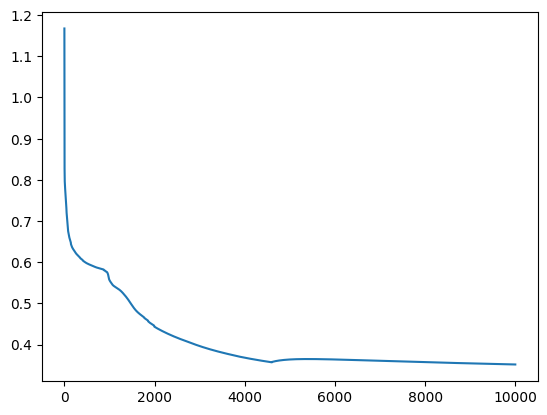

In [6]:
# import matplotlib.pyplot as plt
# plt.plot(cost)
# plt.xlabel('Epochs')
# plt.ylabel('Cost')
# plt.title('Cost vs Epochs')
# plt.show()
import seaborn as sns
sns.lineplot(cost)

In [7]:
def test(lis):
    lis = np.array(lis, dtype=float).flatten()
    X_test = lis[:-1].reshape(1, -1)
    y_true = int(lis[-1])

    Z1 = np.dot(X_test, W1.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2.T) + b2
    A2 = sigmoid(Z2)

    pred = 1 if A2[0][0] >= 0.5 else 0
    return pred == y_true   

acc, tot = 0, 0
for row in testd.values:
    if test(row):
        acc += 1
    tot += 1

print(f"Accuracy: {acc}/{tot} = {acc/tot:.2%}")



Accuracy: 260/319 = 81.50%


In [8]:
print("W1=",W1,"\n","W2=",W2,"\n","b1=",b1,"\n","b2=",b2)

W1= [[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01  1.52302986e+00
  -2.34153375e-01 -2.34136957e-01  1.57921282e+00  7.67434729e-01]
 [-4.69474386e-01  5.42560044e-01 -4.63417693e-01 -4.65729754e-01
   2.41962272e-01 -1.91328024e+00 -1.72491783e+00 -5.62287529e-01]
 [-1.01283112e+00  3.14247333e-01 -9.08024076e-01 -1.41230370e+00
   1.46564877e+00 -2.25776300e-01  6.75282047e-02 -1.42474819e+00]
 [-5.44382725e-01  1.10922590e-01 -1.15099358e+00  3.75698018e-01
  -6.00638690e-01 -2.91693750e-01 -6.01706612e-01  1.85227818e+00]
 [-1.34972247e-02 -1.05771093e+00  8.22544912e-01 -1.22084365e+00
   2.08863595e-01 -1.95967012e+00 -1.32818605e+00  1.96861236e-01]
 [ 7.38466580e-01  1.71368281e-01 -1.15648282e-01 -3.01103696e-01
  -1.47852199e+00 -7.19844208e-01 -4.60638771e-01  1.05712223e+00]
 [ 6.39793623e-01 -1.78576957e+00  3.52196285e-01 -3.98314118e-01
  -3.91984106e-01  3.29926533e-01  1.25078785e+00  9.69061371e-01]
 [-2.14550688e-02 -1.82467828e-01 -1.91591205e-03  1.37058009e-02

In [9]:
W1

array([[ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,
         1.52302986e+00, -2.34153375e-01, -2.34136957e-01,
         1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01, -4.63417693e-01,
        -4.65729754e-01,  2.41962272e-01, -1.91328024e+00,
        -1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01, -9.08024076e-01,
        -1.41230370e+00,  1.46564877e+00, -2.25776300e-01,
         6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01, -1.15099358e+00,
         3.75698018e-01, -6.00638690e-01, -2.91693750e-01,
        -6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00,  8.22544912e-01,
        -1.22084365e+00,  2.08863595e-01, -1.95967012e+00,
        -1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01, -1.15648282e-01,
        -3.01103696e-01, -1.47852199e+00, -7.19844208e-01,
        -4.60638771e-01,  1.05712223e+00],
       [ 6.39793623e-01, -1.785769